# **Project 2**, APS1070 Fall 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Oct 27, 9 PM - 13 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Kecheng Xiao
*   Student Number: 1008709140

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



## **Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _284807_ **[0.1]**
* What features in the dataset are present aside from the 28 main features?  _'Time', 'Amount', (Target: 'Class')_ **[0.1]**
* Which column contains the targets? _'Class'_ **[0.1]**
* What is the meaning of target values?_'1: Fraud' and '0: Non-fraudulent'_ **[0.1]**

In [1]:
'pip install wget'

'pip install wget'

In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (2).gz'

In [3]:
!tar -zxvf creditcard.tar.gz

x creditcard.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcard.csv')

In [5]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
row_num = df.shape[0]
print('row num:', row_num)

row num: 284807


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? _for fraud is only 0.1727%, and the rest 99.83% are non-fraudulent_ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?_Is extremely unbalanced, since most of the transactions are valid and only few of them are considered as fraud, and this is caused by the nature of transactions._ **[0.1]**
* Why is balance/imbalance important? How might this class distribution affect a KNN classifier for example, which we explored in Project 1? _Because with imbalance dataset the model performance will be largely dominated by the major class; in our case, the non-fraudulent transactions will dominate the model accuracy, even though it cannot distinguish fraud transactions._ **[0.5]**
* What metrics should we use to evaluate a model in such cases _If we set fraudulent as negative, we need to use specificity(selectivity or true negative rate) in confusion matrix to detect frauds. If we consider non-fraudulent as negative, we can use precision and F1-score_ **[0.2]**


In [8]:
print('percent of fraud:', df.Class.sum()/row_num)

percent of fraud: 0.001727485630620034


Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [9]:
# Split the data
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.15, random_state=40)
train, val = train_test_split(train, test_size=4/17, random_state=40)

X_train, X_val, X_test, y_train, y_val, y_test \
    = train.drop(['Class'], axis=1), val.drop(['Class'], axis=1), test.drop(['Class'], axis=1), \
      train.Class, val.Class, test.Class

Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

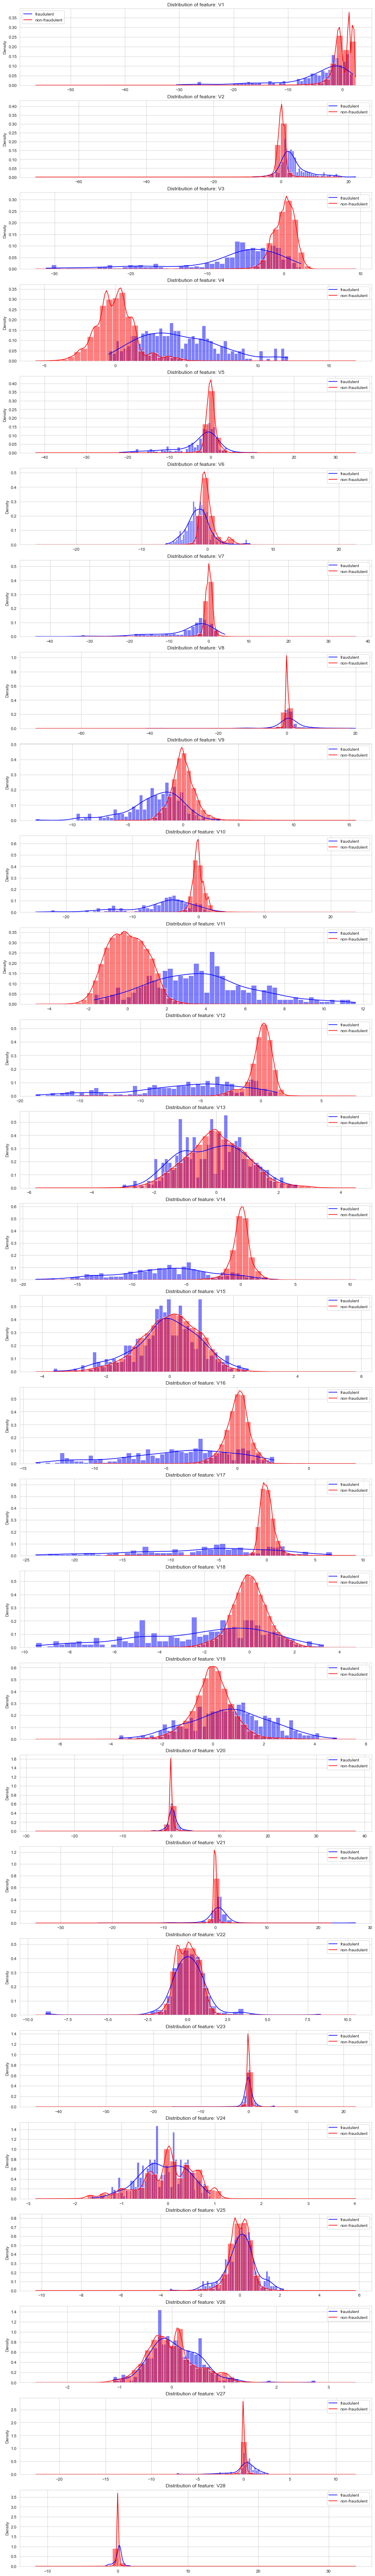

In [10]:
import matplotlib.gridspec as gridspec

features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

**Answer: The graphs shows for each feature how the fraud and non-fraud transactions are distributed with gaussian. Therefore, we can tell the whether a feature is good for being an indicator or not. For example, V3, V4, V11, V12, V14 and V17 are good features to be kept after doing anomaly detection.**

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**



### Part 2a

In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score


# functions for Step 5
# get predictions of y by different thresholds
# O(h*N+N)=O(hN)
def f1_by_threshold(x, y):
    # set threshold by the first quantile, and make 200 steps
    threshold = np.arange(np.min(x), np.quantile(x,.25),
                          (np.quantile(x,.25)-np.min(x))/200)
    # prediction matrix by list comprehension
    pred = [[(lambda v, thr: 0 if (v > thr) else 1)(v, thr) for v in x] for thr in threshold]
    # make a prediction y_hat dataframe
    dict_pred = {'threshold': threshold, 'pred': pred}
    df_pred = pd.DataFrame(dict_pred)
    # calculate f1 and add to the dataframe
    f1_ls = [f1_score(y, y_hat) for y_hat in df_pred['pred']]
    df_pred['f1'] = f1_ls
    # return
    return df_pred

# get the best threshold and f1 score
# O(N)
def best_threshold_f1(df_pred):
    best = df_pred.loc[df_pred['f1'].idxmax()]
    return best['threshold'], best['pred'], best['f1']

# display result with a title
def display_title(sth, title=None):
    print(title, ': ')
    display(sth)

# functions for Step 6
# O(N)
def precision_recall_f1_with_threshold(x, y, best_thr):
    # prediction matrix by list comprehension
    pred = [(lambda v, thr: 0 if (v > thr) else 1)(v, best_thr) for v in x]
    # return precision and recall with the best threshold
    return precision_score(y, pred), recall_score(y, pred), f1_score(y, pred)

In [12]:
# Step 1 - 3
# create list to store AUC outputs
roc_train_single_feat_ls = []
roc_val_single_feat_ls = []
for i in range(1,29):
    # define gaussian model for single feature
    gm_single = GaussianMixture(n_components=1, covariance_type= 'full', random_state=0)
    # fit a single gaussian distribution on a single feature
    gm_single.fit(X_train.iloc[:,i].values.reshape(-1, 1))
    # compute AUC on train set
    p = gm_single.score_samples(X_train.iloc[:,i].values.reshape(-1, 1))
    roc_train_single_feat_ls.append(roc_auc_score(y_train, -1 * p))
    # compute AUC on validation set
    p_v = gm_single.score_samples(X_val.iloc[:,i].values.reshape(-1, 1))
    roc_val_single_feat_ls.append(roc_auc_score(y_val, -1 * p_v))
# convert all AUC outputs into table(dataframe form)
roc = {'train_auc': roc_train_single_feat_ls, 'val_auc': roc_val_single_feat_ls}
df_roc = pd.DataFrame(roc, index=df.columns[1:29])
display_title(df_roc, 'AUC on Train and Validation Sets')

# Step 4
# find best 3 features based on the AUC outputs
max_feat_name = df_roc.nlargest(3, 'val_auc').index
display_title(max_feat_name, 'Best 3 Features')

# Step 5 - 6
# find thresholds that optimize the F1 score
best_threshold_ls = []
best_f1_val_ls = []  # for validation set
# store for the validation set
best_precision_val_ls = []
best_recall_val_ls = []
# store the best precision, recall, f1 in the training set
best_f1_train_ls = []
best_precision_train_ls = []
best_recall_train_ls = []
for n in max_feat_name:
    # define gaussian model for single feature
    gm_single = GaussianMixture(n_components=1, covariance_type= 'full', random_state=0)
    # fit a single gaussian distribution on a single feature
    gm_single.fit(X_train[n].values.reshape(-1, 1))
    ########## Validation Set
    # calculate f1 and thresholds in validation
    p_v = gm_single.score_samples(X_val[n].values.reshape(-1, 1))
    df_thr_pred_f1 = f1_by_threshold(p_v, y_val)
    # get the threshold, prediction and f1 score when f1 is maximized
    best_threshold, best_pred, best_f1_val = best_threshold_f1(df_thr_pred_f1)
    # add optimized threshold and f1
    best_threshold_ls.append(best_threshold)
    best_f1_val_ls.append(best_f1_val)
    # add for the validation set
    best_precision_val, best_recall_val, best_f1_val2 \
        = precision_recall_f1_with_threshold(p_v, y_val, best_threshold) # f1_val1 and 2 is the same
    best_precision_val_ls.append(best_precision_val)
    best_recall_val_ls.append(best_recall_val)
    ########## Training Set
    p = gm_single.score_samples(X_train[n].values.reshape(-1, 1))
    best_precision_train, best_recall_train, best_f1_train = precision_recall_f1_with_threshold(p, y_train, best_threshold)
    best_precision_train_ls.append(best_precision_train)
    best_recall_train_ls.append(best_recall_train)
    best_f1_train_ls.append(best_f1_train)
# show the best f1 and it's threshold
df_f1_thr = pd.DataFrame({'Best Threshold': best_threshold_ls, 'Best F1': best_f1_val_ls}, index=max_feat_name)
display_title(df_f1_thr, 'Best Threshold and F1 in Validation set')
# find and show the best precision, recall, f1 in the validation set
df_val_metrics = pd.DataFrame({'Best Threshold': best_threshold_ls, 'Best Precision': best_precision_val_ls,
                               'Best Recall': best_recall_val_ls, 'Best F1': best_f1_val_ls}, index=max_feat_name)
display_title(df_val_metrics, 'Best Threshold and Metrics in Validation Set')
# show the best precision, recall, f1 in the train set
df_val_metrics = pd.DataFrame({'Best Threshold': best_threshold_ls, 'Best Precision': best_precision_train_ls,
                               'Best Recall': best_recall_train_ls, 'Best F1': best_f1_train_ls}, index=max_feat_name)
display_title(df_val_metrics, 'Best Threshold and Metrics in Training Set')

AUC on Train and Validation Sets : 


,train_auc,val_auc
V1,0.692540,0.716118
V2,0.848245,0.852456
V3,0.870004,0.856759
V4,0.889715,0.883280
V5,0.761153,0.781160
V6,0.727997,0.721413
V7,0.865497,0.887163
V8,0.774903,0.790317
V9,0.799279,0.794323
V10,0.910025,0.917279


Best 3 Features : 


Index(['V14', 'V17', 'V10'], dtype='object')

Best Threshold and F1 in Validation set : 


,Best Threshold,Best F1
V14,-18.911737,0.613065
V17,-22.215301,0.589595
V10,-27.699159,0.211009


Best Threshold and Metrics in Validation Set : 


,Best Threshold,Best Precision,Best Recall,Best F1
V14,-18.911737,0.628866,0.598039,0.613065
V17,-22.215301,0.718310,0.500000,0.589595
V10,-27.699159,0.198276,0.225490,0.211009


Best Threshold and Metrics in Training Set : 


,Best Threshold,Best Precision,Best Recall,Best F1
V14,-18.911737,0.583072,0.577640,0.580343
V17,-22.215301,0.661157,0.496894,0.567376
V10,-27.699159,0.182692,0.236025,0.205962


#### Model Complexity
Set the feature amount with $f$, the row amount of full set data as $N$, so $N_{t}$ denotes the row amount in training set, so as $N_v$ and $N_{te}$:
1. In Step 1-3, $O(f\times(N_t+N_t+N_t+N_v+N_v))=O(fN)$, since we did fit_train + score_train + append_train + score_validation + append_validation operations
Then we need to denote top t feature we wanted as $t$, in our case $t=3$, and number of threshold check per iteration as $h$, my setting is $h=200$:
2. In Step 4, $O(N_vlog(N_v))$ assume the `nlargest()` uses quicksort to find the top n-largest values
3. In Step 5-6, $O(t\times(N_v+h\times N_v+N_v+N_t)=O(thN)$, since for the top t features we did score_validation + threshold_optimization_validation + precision_recall_validation + precision_recall_f1_train operations

Therefore, the $O(thN)$ is the highest complexity terms in optimal threshold task, so it is the overall complexity because of its domination of algorithm performance.

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.5]**

### Part2 b

In [13]:
# Step 1 done in 2a
# find best 3 features based on the AUC outputs
display_title(max_feat_name, 'Best 3 Features from Part2a')

# Step 2
# create non-fraudulent datasets
train_nf, val_nf = train.drop(train[train.Class==1].index), val.drop(val[val.Class==1].index)
X_train_nf, X_val_nf, y_train_nf, y_val_nf = \
    train_nf.drop(['Class'], axis=1), val_nf.drop(['Class'], axis=1), train_nf.Class, val_nf.Class

# Step 3
# Part 2a:(Step 5 - 6)
# Step 5 - 6
# find thresholds that optimize the F1 score
best_threshold_ls = []
best_f1_val_ls = []  # for validation set
# store for the validation set
best_precision_val_ls = []
best_recall_val_ls = []
# store the best precision, recall, f1 in the training set
best_f1_train_ls = []
best_precision_train_ls = []
best_recall_train_ls = []
for n in max_feat_name:
    # define gaussian model for single feature
    gm_single = GaussianMixture(n_components=1, covariance_type= 'full', random_state=0)
    # fit a single gaussian distribution on a single feature
    gm_single.fit(X_train_nf[n].values.reshape(-1, 1)) # change training set to non-fraudulent only
    ########## Validation Set
    # calculate f1 and thresholds in validation
    p_v = gm_single.score_samples(X_val[n].values.reshape(-1, 1))
    df_thr_pred_f1 = f1_by_threshold(p_v, y_val)
    # get the threshold, prediction and f1 score when f1 is maximized
    best_threshold, best_pred, best_f1_val = best_threshold_f1(df_thr_pred_f1)
    # add optimized threshold and f1
    best_threshold_ls.append(best_threshold)
    best_f1_val_ls.append(best_f1_val)
    # add for the validation set
    best_precision_val, best_recall_val, best_f1_val2\
        = precision_recall_f1_with_threshold(p_v, y_val, best_threshold) # f1_val1 and 2 is the same
    best_precision_val_ls.append(best_precision_val)
    best_recall_val_ls.append(best_recall_val)
    ########## Training Set
    p = gm_single.score_samples(X_train[n].values.reshape(-1, 1))
    best_precision_train, best_recall_train, best_f1_train = precision_recall_f1_with_threshold(p, y_train, best_threshold)
    best_precision_train_ls.append(best_precision_train)
    best_recall_train_ls.append(best_recall_train)
    best_f1_train_ls.append(best_f1_train)
# show the best f1 and it's threshold
df_f1_thr = pd.DataFrame({'Best Threshold': best_threshold_ls, 'Best F1': best_f1_val_ls}, index=max_feat_name)
display_title(df_f1_thr, 'Best Threshold and F1 in Validation set')
# find and show the best precision, recall, f1 in the validation set
df_val_metrics = pd.DataFrame({'Best Threshold': best_threshold_ls, 'Best Precision': best_precision_val_ls,
                               'Best Recall': best_recall_val_ls, 'Best F1': best_f1_val_ls}, index=max_feat_name)
display_title(df_val_metrics, 'Best Threshold and Metrics in Validation Set')
# show the best precision, recall, f1 in the train set
df_val_metrics = pd.DataFrame({'Best Threshold': best_threshold_ls, 'Best Precision': best_precision_train_ls,
                               'Best Recall': best_recall_train_ls, 'Best F1': best_f1_train_ls}, index=max_feat_name)
display_title(df_val_metrics, 'Best Threshold and Metrics in Training Set')

Best 3 Features from Part2a : 


Index(['V14', 'V17', 'V10'], dtype='object')

Best Threshold and F1 in Validation set : 


,Best Threshold,Best F1
V14,-21.410286,0.613065
V17,-27.920523,0.589595
V10,-30.040034,0.212963


Best Threshold and Metrics in Validation Set : 


,Best Threshold,Best Precision,Best Recall,Best F1
V14,-21.410286,0.628866,0.598039,0.613065
V17,-27.920523,0.718310,0.500000,0.589595
V10,-30.040034,0.201754,0.225490,0.212963


Best Threshold and Metrics in Training Set : 


,Best Threshold,Best Precision,Best Recall,Best F1
V14,-21.410286,0.586207,0.580745,0.583463
V17,-27.920523,0.661157,0.496894,0.567376
V10,-30.040034,0.184466,0.236025,0.207084


#### Step 4
They are very similar(identical for V14 and V17), because the density of fraudulent data is extremely low, the model fit with only non-fraudulent transactions is sufficient.

## **Part 3: One Gaussian model with multiple features: [2 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

1. Pick two features (say, f1 and f2).
2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
3. On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
5. Fit your Gaussian model on the training set (all samples).
6. Compute AUC on both training and validation sets **[0.25]**
7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
10. Plot two separate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

In [14]:
# function for scatter plotting
import matplotlib.pyplot as plt
def scatter_2feat(data, feat1, feat2, target='Class'):
    # plot two features scatter-plot
    plt.figure(figsize=(12,8))
    scatter = plt.scatter(data[feat1], data[feat2], c=data[target], marker="x", cmap='bwr', alpha=0.3)
    # beautify
    plt.style.use('seaborn-whitegrid')
    plt.title('Scatter-plot with 2 Features')
    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.legend(handles=scatter.legend_elements()[0], labels=['non-fraudulent', 'fraudulent'])
    plt.show()

# function for model fit
def fit_train_validation_comparison(feat1, feat2, fit_num=1):
    # create list to store AUC outputs
    roc_train_ls = []
    roc_val_ls = []
    # fit a gaussian distribution on both features
    GMM = GaussianMixture(n_components=fit_num, covariance_type= 'full', random_state=0)
    input_feat = [feat1, feat2]
    GMM.fit(X_train[input_feat].values)
    # compute AUC on train set
    gm_p = GMM.score_samples(X_train[input_feat].values)
    roc_train_ls.append(roc_auc_score(y_train, -1 * gm_p))
    # compute AUC on validation set
    gm_p_v = GMM.score_samples(X_val[input_feat].values)
    roc_val_ls.append(roc_auc_score(y_val, -1 * gm_p_v))
    # convert all AUC outputs into table(dataframe form)
    df_gm_roc = pd.DataFrame({'n_component':fit_num, 'train_auc': roc_train_ls, 'val_auc': roc_val_ls},
                             index=[str(feat1+' & '+feat2)])
    return df_gm_roc

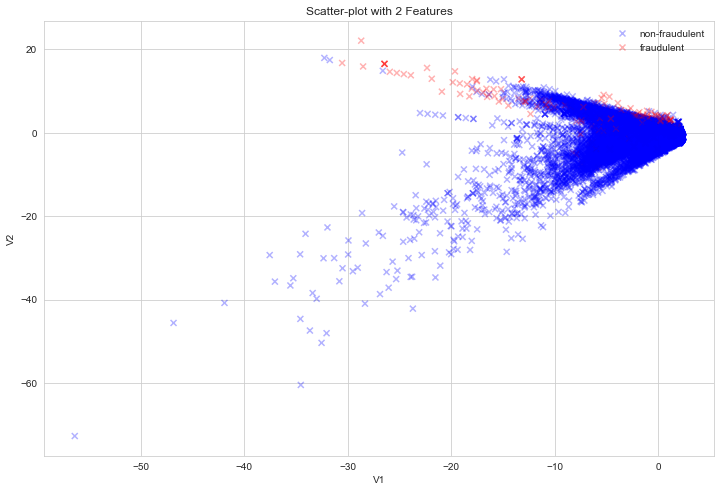

,n_component,train_auc,val_auc
V1 & V2,2,0.884141,0.880248


In [15]:
# Step 1-3, iter 0
scatter_2feat(train, 'V1', 'V2')
# Step 4-6, iter 0
fit_train_validation_comparison(feat1='V1',feat2='V2', fit_num=2)

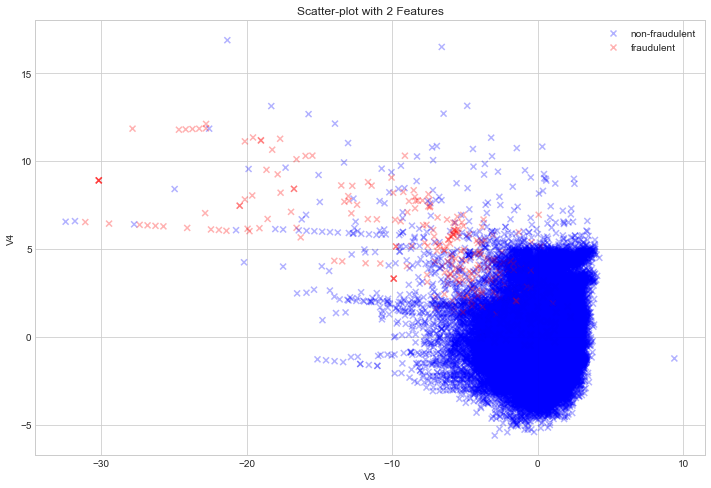

,n_component,train_auc,val_auc
V3 & V4,1,0.922576,0.910155


In [16]:
# Step 1-3, iter 1
scatter_2feat(train, 'V3', 'V4')
# Step 4-6, iter 1
fit_train_validation_comparison(feat1='V3', feat2='V4', fit_num=1)

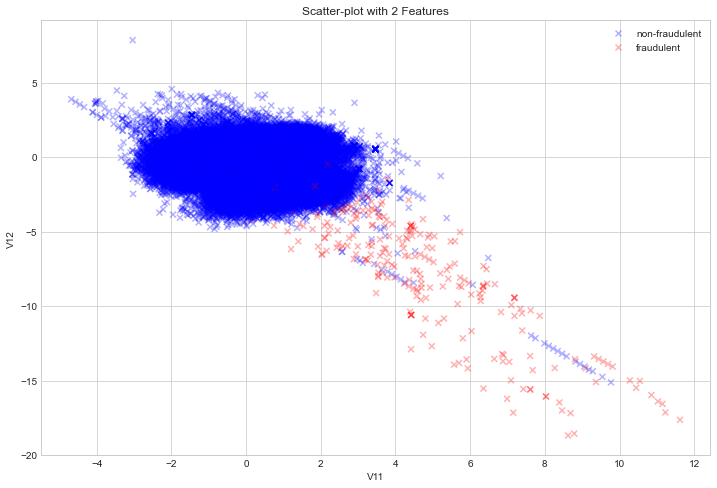

,n_component,train_auc,val_auc
V11 & V12,1,0.926578,0.896657


In [17]:
# Step 1-3, iter 2
scatter_2feat(train, 'V11', 'V12')
# Step 4-6, iter 2
fit_train_validation_comparison(feat1='V11', feat2='V12', fit_num=1)

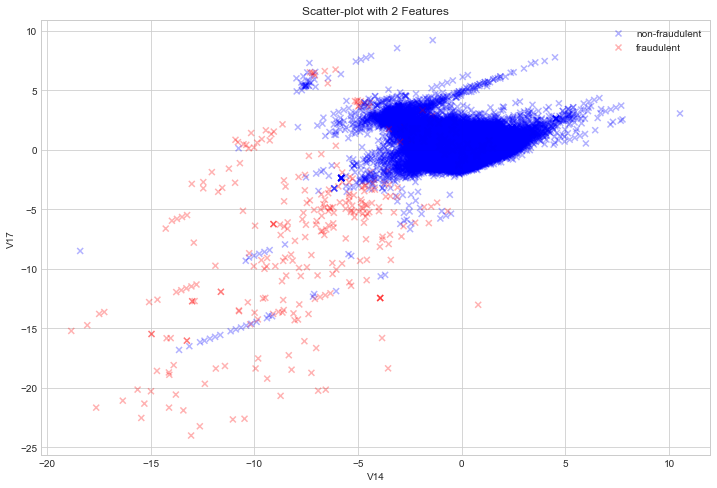

,n_component,train_auc,val_auc
V14 & V17,2,0.957843,0.962695


In [18]:
# Step 1-3, iter 3
scatter_2feat(train, 'V14', 'V17')
# Step 4-6, iter 3
fit_train_validation_comparison(feat1='V14', feat2='V17', fit_num=2)
# Step 7 finished

#### Step 8
Base on the print results, we can easily see the pair V14 and V17 has the highest AUC score on validation set, which is 0.963.

In [19]:
# Step 9
# fit a gaussian distribution on both features
v14v17_GMM = GaussianMixture(n_components=2, covariance_type= 'full', random_state=0)
v14v17_GMM.fit(X_train[['V14','V17']].values)
# compute AUC on validation set
v14v17_p_v = v14v17_GMM.score_samples(X_val[['V14','V17']].values)
# find the best threshold
v14v17_best_thr, v14v17_best_pred, v14v17_best_f1 = best_threshold_f1(f1_by_threshold(v14v17_p_v, y_val))
v14v17_best = pd.DataFrame({'threshold': v14v17_best_thr, 'f1': v14v17_best_f1}, index=['V14 & V17'])
v14v17_best

,threshold,f1
V14 & V17,-9.878907,0.685446


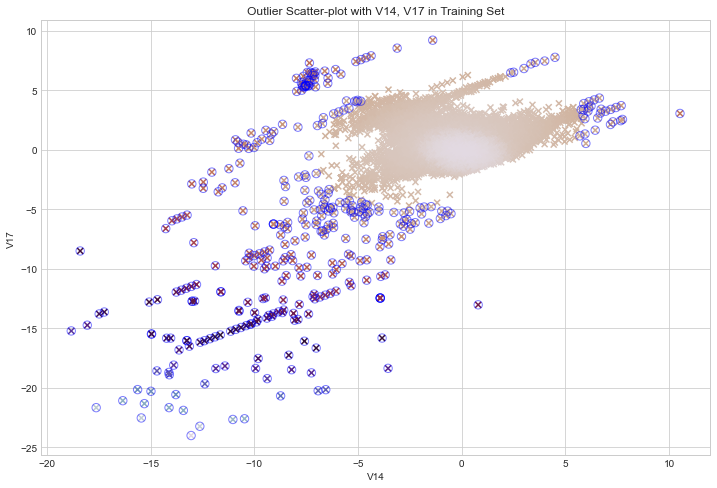

In [20]:
# Step 10
# plot two features scatter-plot
# Training
plt.figure(figsize=(12,8))
plt.style.use('seaborn-whitegrid')
plt.title('Outlier Scatter-plot with V14, V17 in Training Set')
c = v14v17_GMM.score_samples(X_train[['V14','V17']].values)
# find position of V14 and V17
p1 = list(train.columns).index('V14')
p2 = list(train.columns).index('V17')
# plot
plt.scatter(X_train.iloc[:,p1], X_train.iloc[:,p2], c=c, cmap='twilight', marker='x')
outliers = np.nonzero(c < v14v17_best['threshold'][0])[0]
plt.scatter(X_train.iloc[outliers,p1], X_train.iloc[outliers,p2],
            marker="o", facecolor= "none", edgecolor="b", s=70, alpha=0.5)
plt.xlabel('V14')
plt.ylabel('V17')
plt.show()

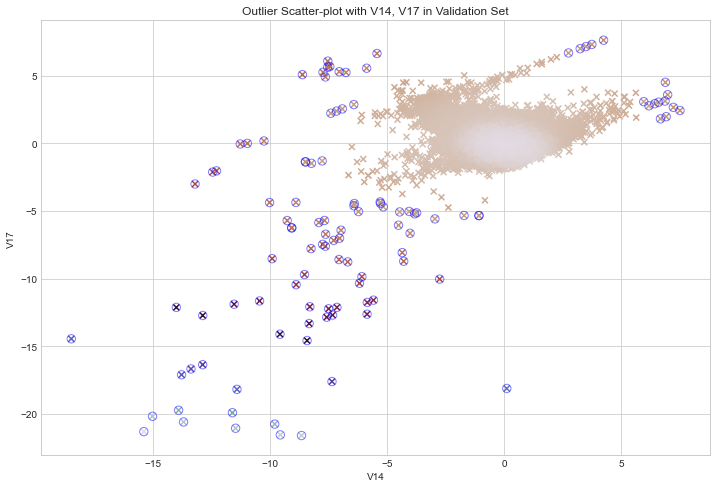

In [21]:
# Validation
plt.figure(figsize=(12,8))
plt.style.use('seaborn-whitegrid')
plt.title('Outlier Scatter-plot with V14, V17 in Validation Set')
c = v14v17_GMM.score_samples(X_val[['V14','V17']].values)
# find position of V14 and V17
p1 = list(train.columns).index('V14')
p2 = list(train.columns).index('V17')
# plot
plt.scatter(X_val.iloc[:,p1], X_val.iloc[:,p2], c=c, cmap='twilight', marker='x')
outliers = np.nonzero(c < v14v17_best['threshold'][0])[0]
plt.scatter(X_val.iloc[outliers,p1], X_val.iloc[outliers,p2],
            marker="o", facecolor= "none", edgecolor="b", s=70, alpha=0.5)
plt.xlabel('V14')
plt.ylabel('V17')
plt.show()

## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model? Why? **[0.5]**

In [22]:
def best_c_f1(s1_ls, s2_ls, y):
    # set threshold by the first quantile, and make 200 steps
    c_range = np.arange(0, 10.1, 0.1)
    # prediction matrix by list comprehension
    pred = [[(lambda l, vc: 0 if (s1_ls[l] > vc * s2_ls[l]) else 1)(l, vc) for l in range(len(s1_ls))] for vc in c_range]
    # make a prediction y_hat dataframe
    dict_pred = {'c': c_range, 'pred': pred}
    df_pred = pd.DataFrame(dict_pred)
    # calculate f1 and add to the dataframe
    f1_ls = [f1_score(y, y_hat) for y_hat in df_pred['pred']]
    df_pred['f1'] = f1_ls
    # return
    return df_pred

# get the best threshold and f1 score
def find_best_c(df_pred):
    best = df_pred.loc[df_pred['f1'].idxmax()]
    return best['c'], best['pred'], best['f1']

# get the threshold and f1 score by given c
def find_loc_c(df_pred, c_val):
    best = df_pred.loc[df_pred['c'] == c_val]
    return best['c'], best['pred'], best['f1']

In [23]:
# create fraudulent datasets (for step 2)
train_f, val_f = train.drop(train[train.Class==0].index), val.drop(val[val.Class==0].index)
X_train_f, X_val_f, y_train_f, y_val_f =\
    train_f.drop(['Class'], axis=1), val_f.drop(['Class'], axis=1), train_f.Class, val_f.Class

def find_best_c_feat2(input_feature, x=X_val, y=y_val):
    # Step 1
    # fit with non-fraudulent
    G1 = GaussianMixture(n_components=1, covariance_type= 'full', random_state=0)
    G1.fit(X_train_nf[input_feature].values.reshape(-1, 1))

    # Step 2
    # fit with fraudulent
    G2 = GaussianMixture(n_components=1, covariance_type= 'full', random_state=0)
    G2.fit(X_train_f[input_feature].values.reshape(-1, 1))

    # Step 3
    S1 = G1.score_samples(x[input_feature].values.reshape(-1, 1))
    S2 = G2.score_samples(x[input_feature].values.reshape(-1, 1))

    # Step 4
    return find_best_c(best_c_f1(S1, S2, y))

def loc_c_feat2(input_feature, c_val, x=X_train, y=y_train):
    # Step 1
    # fit with non-fraudulent
    G1 = GaussianMixture(n_components=1, covariance_type= 'full', random_state=0)
    G1.fit(X_train_nf[input_feature].values.reshape(-1, 1))

    # Step 2
    # fit with fraudulent
    G2 = GaussianMixture(n_components=1, covariance_type= 'full', random_state=0)
    G2.fit(X_train_f[input_feature].values.reshape(-1, 1))

    # Step 3
    S1 = G1.score_samples(x[input_feature].values.reshape(-1, 1))
    S2 = G2.score_samples(x[input_feature].values.reshape(-1, 1))

    # Step 4
    return find_loc_c(best_c_f1(S1, S2, y), c_val)

In [24]:
# Step 5 Validation
c_ls = []
f1_c_ls = []
precision_c_ls = []
recall_c_ls = []
for i in df.columns[1:29]:
    r1, r2, r3 = find_best_c_feat2(i)
    c_ls.append(r1)
    precision_c_ls.append(precision_score(y_val, r2))
    recall_c_ls.append(recall_score(y_val, r2))
    f1_c_ls.append(r3)
df_c = pd.DataFrame({'c': c_ls, 'f1': f1_c_ls, 'precision': precision_c_ls,
                    'recall': recall_c_ls}, index=df.columns[1:29])
display_title(df_c, 'Best c for all Vs in Validation')

Best c for all Vs in Validation : 


,c,f1,precision,recall
V1,6.6,0.152381,0.148148,0.156863
V2,5.9,0.175439,0.833333,0.098039
V3,7.6,0.312139,0.380282,0.264706
V4,4.2,0.377358,0.363636,0.392157
V5,8.3,0.193939,0.253968,0.156863
V6,1.9,0.118812,0.079470,0.235294
V7,10.0,0.237113,0.250000,0.225490
V8,6.9,0.104167,0.080645,0.147059
V9,3.4,0.448980,0.733333,0.323529
V10,6.8,0.397590,0.515625,0.323529


In [25]:
# Step 5 Training
f1_c_ls = []
precision_c_ls = []
recall_c_ls = []
c_p = 0
for i in df.columns[1:29]:
    r1, r2, r3 = loc_c_feat2(i, c_ls[c_p], X_train, y_train)
    r2 = r2.to_list()[0]
    r3 = r3.to_list()[0]
    precision_c_ls.append(precision_score(y_train, r2))
    recall_c_ls.append(recall_score(y_train, r2))
    f1_c_ls.append(r3)
    c_p += 1
df_c = pd.DataFrame({'c': c_ls, 'f1': f1_c_ls, 'precision': precision_c_ls,
                     'recall': recall_c_ls}, index=df.columns[1:29])
display_title(df_c, 'Best c for all Vs in Training')

Best c for all Vs in Training : 


,c,f1,precision,recall
V1,6.6,0.128440,0.126506,0.130435
V2,5.9,0.127778,0.605263,0.071429
V3,7.6,0.268714,0.351759,0.217391
V4,4.2,0.355958,0.346041,0.366460
V5,8.3,0.164706,0.223404,0.130435
V6,1.9,0.100000,0.067164,0.195652
V7,10.0,0.245378,0.267399,0.226708
V8,6.9,0.063694,0.048387,0.093168
V9,3.4,0.406321,0.743802,0.279503
V10,6.8,0.383803,0.443089,0.338509


#### Step 5
The best is V17 in Validation and V12 in Training, c and metrics combinations are showed in table above.
#### Step 6
We cannot report AUC for this model due to we don't have a traditional AUC setup, such as true positive rate, false positive rate and threshold; instead we calculate S1, S2 and best c, which can result a similar AUC shaped graph. Still it is not a traditional AUC.

## **Part 5: Multivariate and Mixture of Gaussian's Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussian's on non-fraudulent transactions or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussian's? How many components? Summarize your findings with tables or plots. **[3]**

**Answer: I tried 11 models (number 0 to 10), and found out for multiple features, the non-fraud dataset training usually works well. But the two Gaussian models often perform better than one Gaussian. Also, adding more good features are helpful to model performance, but bad features will drop the performance dramatically.
Overall, the best model is model 9, with feature 'V10', 'V11', 'V12', 'V14' and 'V17' (5 features) and two Gaussian and number of components are 1 for non-fraudulent and 2 for fraudulent, the metrics are showed in the table below.**



**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

In [26]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score

# for two Gaussian model with multiple features
def find_best_c_feat(input_feature, x=X_val, y=y_val, fit_num=2):
    # fit with non-fraudulent
    G1 = GaussianMixture(n_components=1, covariance_type= 'full', random_state=0)
    G1.fit(X_train_nf[input_feature].values)

    # fit with fraudulent
    G2 = GaussianMixture(n_components=fit_num, covariance_type= 'full', random_state=0)
    G2.fit(X_train_f[input_feature].values)

    # score calculation
    S1 = G1.score_samples(x[input_feature].values)
    S2 = G2.score_samples(x[input_feature].values)

    # get c, the threshold for two G
    return find_best_c(best_c_f1(S1, S2, y))

def loc_c_feat(input_feature, c_val, x=X_train, y=y_train, fit_num=2):
    # fit with non-fraudulent
    G1 = GaussianMixture(n_components=1, covariance_type= 'full', random_state=0)
    G1.fit(X_train_nf[input_feature].values)

    # fit with fraudulent
    G2 = GaussianMixture(n_components=fit_num, covariance_type= 'full', random_state=0)
    G2.fit(X_train_f[input_feature].values)

    # score calculation
    S1 = G1.score_samples(x[input_feature].values)
    S2 = G2.score_samples(x[input_feature].values)

    # Step 4
    return find_loc_c(best_c_f1(S1, S2, y), c_val)


def multivariable_mixture_Gaussian(feature_list, test_set = False, n_components=1, two_gaussian=False, non_fraud=False):
    """
    :param test_set: a boolean determine whether to use validation set or test set
    :param feature_list: input feature list, need to reshape to fit single feature GMM
    :param n_components: Gaussian Mixture model's n_components
    :param two_gaussian: determine which model should be used, either 1 Gaussian or 2 Gaussian models, the potential are:
            - One Gaussian Model
                - One Gaussian with 1 Feature
                - One Gaussian with multiple Features
            - Two Gaussian Model
                - Two Gaussian with 1 Feature
                - Two Gaussian with multiple Features
    :param non_fraud: train with only non_fraud data
    :return: the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets
    """
    ###### Data Preparation
    # initialize all metrics
    best_auc_train_ = None
    best_auc_val_ = None
    # set for testing
    if test_set:
        X_val_ = X_test
        y_val_ = y_test
    else:
        X_val_ = X_val
        y_val_ = y_val

    ###### Modeling
    # One Gaussian
    if not two_gaussian:
        #  with 1 Feature
        if len(feature_list) == 1: # determine single feature or not
            # define gaussian model for single feature
            GMM = GaussianMixture(n_components=n_components, covariance_type= 'full', random_state=0)
            # fit a single gaussian distribution on a single feature
            if non_fraud:
                GMM.fit(X_train_nf[feature_list[0]].values.reshape(-1, 1))
            else:
                GMM.fit(X_train[feature_list[0]].values.reshape(-1, 1))
            ###### Metrics Computation
            #################### Validation Set
            # compute AUC on train set
            P = GMM.score_samples(X_train[feature_list[0]].values.reshape(-1, 1))
            best_auc_train_ = (roc_auc_score(y_train, -1 * P))
            # compute AUC on validation set
            P_v = GMM.score_samples(X_val_[feature_list[0]].values.reshape(-1, 1))
            best_auc_val_ = roc_auc_score(y_val_, -1 * P_v)
            df_thr_pred_f1_ = f1_by_threshold(P_v, y_val_)
            # get the threshold, prediction and f1 score when f1 is maximized
            best_threshold_, best_pred_, best_f1_val_ = best_threshold_f1(df_thr_pred_f1_)
            best_precision_val_, best_recall_val_, best_f1_val2_\
                = precision_recall_f1_with_threshold(P_v, y_val_, best_threshold_) # f1_val1 and 2 is the same
            #################### Training Set
            best_precision_train_, best_recall_train_, best_f1_train_ = precision_recall_f1_with_threshold(P, y_train, best_threshold_)
        #  with multiple Features
        else:
            # fit a gaussian distribution on both features
            GMM = GaussianMixture(n_components=n_components, covariance_type= 'full', random_state=0)
            # fit a single gaussian distribution on multiple features
            if non_fraud:
                GMM.fit(X_train_nf[feature_list].values)
            else:
                GMM.fit(X_train[feature_list].values)
            #################### Validation Set
            # compute AUC on train set
            P = GMM.score_samples(X_train[feature_list].values)
            best_auc_train_ = roc_auc_score(y_train, -1 * P)
            # compute AUC on validation set
            P_v = GMM.score_samples(X_val_[feature_list].values)
            best_auc_val_ = roc_auc_score(y_val_, -1 * P_v)
            best_threshold_, best_pred_, best_f1_val_ = best_threshold_f1(f1_by_threshold(P_v, y_val_))
            best_precision_val_, best_recall_val_, best_f1_val2_\
                = precision_recall_f1_with_threshold(P_v, y_val_, best_threshold_) # f1_val1 and 2 is the same
            #################### Training Set
            best_precision_train_, best_recall_train_, best_f1_train_ = precision_recall_f1_with_threshold(P, y_train, best_threshold_)
    else:
        if len(feature_list) == 1: # determine single feature or not
            #################### Validation Set
            best_threshold_, best_pred_, best_f1_val_ = find_best_c_feat2(feature_list[0], x=X_val_, y=y_val_)
            best_precision_val_ = precision_score(y_val_, best_pred_)
            best_recall_val_ = recall_score(y_val_, best_pred_)
            #################### Training Set
            best_threshold2_, best_pred_, best_f1_train_ = loc_c_feat2(feature_list[0], best_threshold_, X_train, y_train)
            best_pred_ = best_pred_.to_list()[0]
            best_f1_train_ = best_f1_train_.to_list()[0]
            best_precision_train_ = precision_score(y_train, best_pred_)
            best_recall_train_ = recall_score(y_train, best_pred_)
        else:
            #################### Validation Set
            best_threshold_, best_pred_, best_f1_val_ = find_best_c_feat(feature_list, x=X_val_, y=y_val_, fit_num=n_components+1)
            best_precision_val_ = precision_score(y_val_, best_pred_)
            best_recall_val_ = recall_score(y_val_, best_pred_)
            #################### Training Set
            best_threshold2_, best_pred_, best_f1_train_ = loc_c_feat(feature_list, best_threshold_, fit_num=n_components+1)
            best_pred_ = best_pred_.to_list()[0]
            best_f1_train_ = best_f1_train_.to_list()[0]
            best_precision_train_ = precision_score(y_train, best_pred_)
            best_recall_train_ = recall_score(y_train, best_pred_)

    ###### Output
    return pd.DataFrame({'Two Gaussian': two_gaussian, 'Threshold': best_threshold_,
                         'Non-fraud': non_fraud, 'N': n_components,
                         'AUC (T)': best_auc_train_, 'AUC (V)': best_auc_val_,
                         'Precision (T)': best_precision_train_, 'Precision (V)': best_precision_val_,
                         'Recall (T)': best_recall_train_, 'Recall (V)': best_recall_val_,
                         'F1 (T)': best_f1_train_, 'F1 (V)': best_f1_val_}, index=[' '.join(feature_list)])

In [27]:
# One Gaussian All features
model0 = multivariable_mixture_Gaussian(df.columns[1:29])

In [28]:
# One Gaussian All features with Non-fraud training
model1 = multivariable_mixture_Gaussian(df.columns[1:29], non_fraud=True)

In [29]:
# One Gaussian All features with Non-fraud training and n=3
model2 = multivariable_mixture_Gaussian(df.columns[1:29], non_fraud=True, n_components=2)

In [30]:
# One Gaussian multiple features
model3 = multivariable_mixture_Gaussian(['V10', 'V14', 'V17'])

In [31]:
# One Gaussian multiple features and n = 3
model4 = multivariable_mixture_Gaussian(['V10', 'V11', 'V12', 'V14', 'V17'], n_components=2)

In [32]:
# One Gaussian multiple features with Non-fraud training n = 3
model5 = multivariable_mixture_Gaussian(['V10', 'V11', 'V12', 'V14', 'V17'], non_fraud=True, n_components=2)

In [33]:
# One Gaussian multiple features with Non-fraud training n = 3
model6 = multivariable_mixture_Gaussian(['V10', 'V11', 'V12', 'V14', 'V17'], non_fraud=True, n_components=3)

In [34]:
# Two Gaussian multiple features
model7 = multivariable_mixture_Gaussian(['V10', 'V14', 'V17'], two_gaussian=True)

In [35]:
# Two Gaussian multiple features n = 2
model8 = multivariable_mixture_Gaussian(['V10', 'V14', 'V17'], two_gaussian=True, n_components=2)

In [36]:
# Two Gaussian multiple features + more features
model9 = multivariable_mixture_Gaussian(['V10', 'V11', 'V12', 'V14', 'V17'], two_gaussian=True)

In [37]:
# Two Gaussian multiple features n = 3
model10 = multivariable_mixture_Gaussian(['V10', 'V11', 'V12', 'V14', 'V17'], two_gaussian=True, n_components=3)

In [38]:
df_table = pd.concat([model0, model1, model2, model3, model4, model5, model6, model7, model8, model9, model10])
df_table

,Two Gaussian,Threshold,Non-fraud,N,AUC (T),AUC (V),Precision (T),Precision (V),Recall (T),Recall (V),F1 (T),F1 (V)
V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28,False,-757.575833,False,1,0.949408,0.948915,0.411043,0.428571,0.208075,0.205882,0.276289,0.278146
V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28,False,-688.711027,True,1,0.954366,0.953892,0.514851,0.548387,0.484472,0.500000,0.499200,0.523077
V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28,False,-286.818612,True,2,0.939963,0.934583,0.506369,0.530612,0.493789,0.509804,0.500000,0.520000
V10 V14 V17,False,-63.878423,False,1,0.957583,0.964923,0.596958,0.683544,0.487578,0.529412,0.536752,0.596685
V10 V11 V12 V14 V17,False,-65.863629,False,2,0.963999,0.952826,0.758475,0.780822,0.555901,0.558824,0.641577,0.651429
V10 V11 V12 V14 V17,False,-33.765941,True,2,0.962238,0.960962,0.757576,0.802326,0.698758,0.676471,0.726979,0.734043
V10 V11 V12 V14 V17,False,-32.416695,True,3,0.961677,0.95898,0.751656,0.795455,0.704969,0.686275,0.727564,0.736842
V10 V14 V17,True,5.900000,False,1,None,None,0.781350,0.853933,0.754658,0.745098,0.767773,0.795812
V10 V14 V17,True,4.600000,False,2,None,None,0.764881,0.810000,0.798137,0.794118,0.781155,0.801980
V10 V11 V12 V14 V17,True,7.300000,False,1,None,None,0.853571,0.915663,0.742236,0.745098,0.794020,0.821622


## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**

**Answer: The two Gaussian model with 1 n_component in non-fraudulent and 2 in fraudulent and having feature 'V10', 'V11', 'V12', 'V14' and 'V17' works the best. The F1 Score is high up to 0.85, and Precision and Recall are 0.86 and 0.84(The (V) used to be Validation set indicator, but with test_set = True, (V) means Test set)**


In [39]:
multivariable_mixture_Gaussian(['V10', 'V11', 'V12', 'V14', 'V17'], two_gaussian=True, test_set=True)

,Two Gaussian,Threshold,Non-fraud,N,AUC (T),AUC (V),Precision (T),Precision (V),Recall (T),Recall (V),F1 (T),F1 (V)
V10 V11 V12 V14 V17,True,6.5,False,1,None,None,0.83737,0.863636,0.751553,0.838235,0.792144,0.850746
